In [8]:
import pandas as pd

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['label'] = 0   # Fake
true['label'] = 1   # Real

df = pd.concat([fake, true])
df = df[['text', 'label']]
df.dropna(inplace=True)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test_vec)))


Accuracy: 0.9860801781737194


In [11]:
def predict_news(text):
    vec = vectorizer.transform([text])
    return "REAL" if model.predict(vec)[0] == 1 else "FAKE"

predict_news("Government launches new AI education policy")


'FAKE'

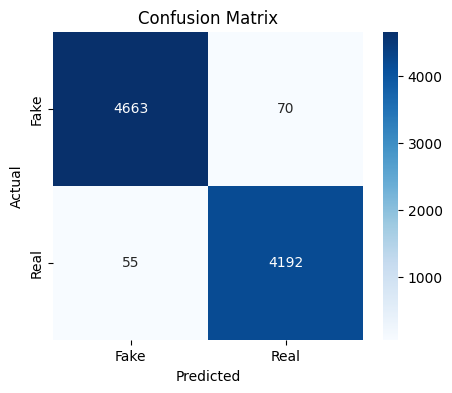

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, model.predict(X_test_vec))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
